In [0]:
import warnings 
warnings.filterwarnings('ignore')

## K-Nearest-Neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x,y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h:X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Visualization

6.Transform the dataset for building machine learning model.

7.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Finding Optimal K value

11.Repeat 7,8,9 steps.

## Problem statement

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Attributes of the dataset:** https://archive.ics.uci.edu/ml/datasets/Iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Question 1

Import the data set and print 10 random rows from the data set

In [0]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
iris = pd.read_csv("/content/drive/My Drive/Colab Notebooks/R3L2/Iris.csv") 

In [6]:
iris.sample(10)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
123,6.3,2.7,4.9,1.8,Iris-virginica
8,4.4,2.9,1.4,0.2,Iris-setosa
57,4.9,2.4,3.3,1.0,Iris-versicolor
73,6.1,2.8,4.7,1.2,Iris-versicolor
2,4.7,3.2,1.3,0.2,Iris-setosa
98,5.1,2.5,3.0,1.1,Iris-versicolor
84,5.4,3.0,4.5,1.5,Iris-versicolor
75,6.6,3.0,4.4,1.4,Iris-versicolor
48,5.3,3.7,1.5,0.2,Iris-setosa
72,6.3,2.5,4.9,1.5,Iris-versicolor


In [8]:
iris.dtypes

Sepal Length (in cm)    float64
Sepal Width in (cm)     float64
Petal length (in cm)    float64
Petal width (in cm)     float64
Class                    object
dtype: object

## Data Pre-processing

## Question 2 - Estimating missing values

*Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median) *

In [15]:
iris.isna().sum()

Sepal Length (in cm)    0
Sepal Width in (cm)     0
Petal length (in cm)    0
Petal width (in cm)     0
Class                   0
dtype: int64

In [13]:
iris.eq(0.0).any()
# All the column types are float and none is having zero value neither na value. so all the data points are available.

Sepal Length (in cm)    False
Sepal Width in (cm)     False
Petal length (in cm)    False
Petal width (in cm)     False
Class                   False
dtype: bool

## Question 3 - Dealing with categorical data

Change all the classes to numericals (0to2).

In [17]:
iris['Class'] = iris['Class'].replace('Iris-setosa', 0)
iris = iris.replace('Iris-versicolor', 1)
iris = iris.replace('Iris-virginica', 2)
iris.head(5)

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [18]:
iris.tail()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2
149,5.9,3.0,5.1,1.8,2


## Question 4

*Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.*

In [19]:
iris.corr()
# None of the feature is availabel in the mentioned range of -.1 to .1. So none of the data attributes will be removed

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


## Question 5

*Observe the independent variables variance and drop such variables having no variance or almost zero variance(variance < 0.1). They will be having almost no influence on the classification.*

In [20]:
iris.var()

Sepal Length (in cm)    0.685694
Sepal Width in (cm)     0.188004
Petal length (in cm)    3.113179
Petal width (in cm)     0.582414
Class                   0.671141
dtype: float64

None of the column is having variance less than 0.1, so none of the columns are dropped

## Question 6

*Plot the scatter matrix for all the variables.*

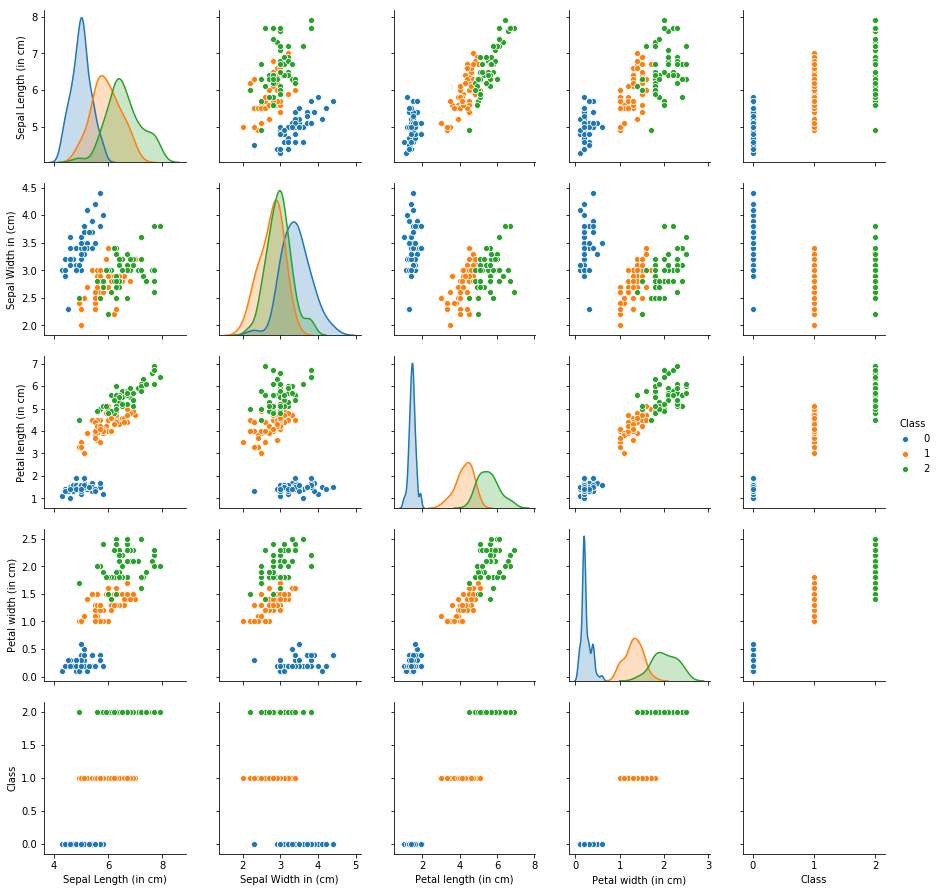

In [23]:
sns.pairplot(iris,  hue="Class")

## Split the dataset into training and test sets

## Question 7

*Split the dataset into training and test sets with 80-20 ratio.*

In [0]:
# Sepal Length (in cm)	Sepal Width in (cm)	Petal length (in cm)	Petal width (in cm)	Class
irisTrainingDF = iris[['Sepal Length (in cm)','Sepal Width in (cm)','Petal length (in cm)','Petal width (in cm)']]
irisTestDF = iris[['Class']]

In [0]:
from sklearn.model_selection import train_test_split
# Test size is .2 to take 20% data into test data frame
X_train,X_test,y_train,y_test=train_test_split(irisTrainingDF,irisTestDF, test_size=0.20, random_state=40)

In [54]:
print(X_train.head())
print(X_test.head())
print(y_train.head())
print(y_test.head())

    Sepal Length (in cm)  ...  Petal width (in cm)
62                   6.0  ...                  1.0
23                   5.1  ...                  0.5
26                   5.0  ...                  0.4
48                   5.3  ...                  0.2
2                    4.7  ...                  0.2

[5 rows x 4 columns]
     Sepal Length (in cm)  ...  Petal width (in cm)
38                    4.4  ...                  0.2
66                    5.6  ...                  1.5
115                   6.4  ...                  2.3
117                   7.7  ...                  2.2
89                    5.5  ...                  1.3

[5 rows x 4 columns]
    Class
62      1
23      0
26      0
48      0
2       0
     Class
38       0
66       1
115      2
117      2
89       1


## Question 8 - Model

*Build the model and train and test on training and test sets respectively using **scikit-learn**. Print the Accuracy of the model with different values of **k=3,5,9**.*

**Hint:** For accuracy you can check **accuracy_score()** in scikit-learn

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score

NNH3 = KNeighborsClassifier(n_neighbors = 3, weights = 'uniform', 
                           metric = 'euclidean')
NNH5 = KNeighborsClassifier(n_neighbors = 5, weights = 'uniform', 
                           metric = 'euclidean')
NNH9 = KNeighborsClassifier(n_neighbors = 9, weights = 'uniform', 
                           metric = 'euclidean')
print(NNH3)
print(NNH5)
print(NNH9)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')


In [56]:
NNH3.fit(X_train, y_train)
NNH5.fit(X_train, y_train)
NNH9.fit(X_train, y_train)
y_predict3=NNH3.predict(X_test)
y_predict5=NNH5.predict(X_test)
y_predict9=NNH9.predict(X_test)

from sklearn.metrics import roc_auc_score
#roc_auc = roc_auc_score(  y_test,y_predict)
h_auc3 = accuracy_score(y_test,y_predict3)
h_auc5 = accuracy_score(y_test,y_predict5)
h_auc9 = accuracy_score(y_test,y_predict9)
print('h_auc3: ',h_auc3)
print('h_auc5: ',h_auc5)
print('h_auc9: ',h_auc9)
# Best Accuracy 

h_auc3:  1.0
h_auc5:  1.0
h_auc9:  1.0


## Question 9 - Cross Validation

Run the KNN with no of neighbours to be 1,3,5..19 and *Find the **optimal number of neighbours** from the above list using the Mis classification error

Hint:

Misclassification error (MSE) = 1 - Test accuracy score. Calculated MSE for each model with neighbours = 1,3,5...19 and find the model with lowest MSE

In [77]:
error=[];
for x in range(1, 20,2):
  X_train,X_test,y_train,y_test=train_test_split(irisTrainingDF,irisTestDF, test_size=0.20, random_state=x+40)
  NNHX = KNeighborsClassifier(n_neighbors = x, weights = 'uniform', metric = 'euclidean')
  NNHX.fit(X_train, y_train)
  y_predict=NNHX.predict(X_test)
  h_aucX = accuracy_score(y_test,y_predict)
  #print(x)
  mse=1-h_aucX;
  error.append(mse)
  print(x, '--', ':h_auc: ',h_aucX, ' MSE:',mse)
  

1 -- :h_auc:  0.9  MSE: 0.09999999999999998
3 -- :h_auc:  1.0  MSE: 0.0
5 -- :h_auc:  0.9666666666666667  MSE: 0.033333333333333326
7 -- :h_auc:  1.0  MSE: 0.0
9 -- :h_auc:  0.9333333333333333  MSE: 0.06666666666666665
11 -- :h_auc:  0.9333333333333333  MSE: 0.06666666666666665
13 -- :h_auc:  0.9666666666666667  MSE: 0.033333333333333326
15 -- :h_auc:  0.9666666666666667  MSE: 0.033333333333333326
17 -- :h_auc:  1.0  MSE: 0.0
19 -- :h_auc:  1.0  MSE: 0.0


In [0]:
#Random state has also been kept as varying and the lowest MSE coming is for value of k as 3,7,17,19

#Optimal value of k can be any value 3,7,17 and 19

## Question 10

*Plot misclassification error vs k (with k value on X-axis) using matplotlib.*

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'MSE')

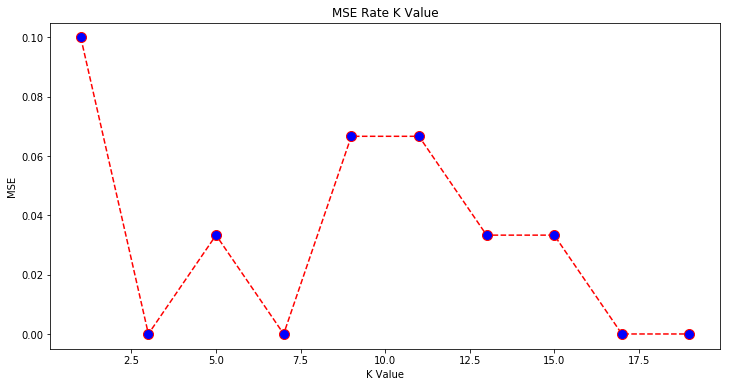

In [80]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 20,2), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('MSE Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('MSE') 

# Naive Bayes with Iris Data

In [0]:
#Load all required library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.decomposition import PCA


### Slice  Iris data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [0]:
X = iris[['Sepal Length (in cm)','Sepal Width in (cm)','Petal length (in cm)','Petal width (in cm)']]
y = iris[['Class']]

In [0]:
#Check the dataset
print(y)
print(X)

# Question 11 
Find the distribution of target variable (Class)

And, Plot the distribution of target variable using histogram

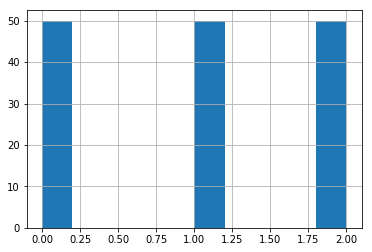

In [87]:
iris['Class'].hist()

In [94]:
iris.head()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Question 12 
Find Correlation among all variables and give your insights 

In [0]:
#Please note, it's Require to remove correlated features because they are voted twice in the model and 
## it can lead to over inflating importance.We will ignore it here

In [95]:
iris.corr()

,Sepal Length (in cm),Sepal Width in (cm),Petal length (in cm),Petal width (in cm),Class
Sepal Length (in cm),1.000000,-0.109369,0.871754,0.817954,0.782561
Sepal Width in (cm),-0.109369,1.000000,-0.420516,-0.356544,-0.419446
Petal length (in cm),0.871754,-0.420516,1.000000,0.962757,0.949043
Petal width (in cm),0.817954,-0.356544,0.962757,1.000000,0.956464
Class,0.782561,-0.419446,0.949043,0.956464,1.000000


Below features are inversely related
1. Sepal width and Sepal Length
2. petal width and sepal width

Petal length and petal width is mjorily correlated in positive manner





### Split data in Training and test set in 80:20.

In [0]:
X_train,X_test,y_train,y_test=train_test_split(irisTrainingDF,irisTestDF, test_size=0.20, random_state=42)

### Question 13 
Do Feature Scaling 

In [97]:
# Use StandardScaler or similar methods
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X_train))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [98]:
print(scaler.transform(X_train))

[[-1.47393679  1.22037928 -1.5639872  -1.30948358]
 [-0.13307079  3.02001693 -1.27728011 -1.04292204]
 [ 1.08589829  0.09560575  0.38562104  0.28988568]
 [-1.23014297  0.77046987 -1.21993869 -1.30948358]
 [-1.7177306   0.32056046 -1.39196294 -1.30948358]
 [ 0.59831066 -1.25412249  0.72966956  0.95628954]
 [ 0.72020757  0.32056046  0.44296246  0.42316645]
 [-0.74255534  0.99542457 -1.27728011 -1.30948358]
 [-0.98634915  1.22037928 -1.33462153 -1.30948358]
 [-0.74255534  2.34515281 -1.27728011 -1.44276436]
 [-0.01117388 -0.80421307  0.78701097  0.95628954]
 [ 0.23261993  0.77046987  0.44296246  0.55644722]
 [ 1.08589829  0.09560575  0.5576453   0.42316645]
 [-0.49876152  1.8952434  -1.39196294 -1.04292204]
 [-0.49876152  1.44533399 -1.27728011 -1.30948358]
 [-0.37686461 -1.47907719 -0.01576889 -0.24323741]
 [ 0.59831066 -0.57925837  0.78701097  0.42316645]
 [ 0.72020757  0.09560575  1.01637665  0.82300877]
 [ 0.96400139 -0.12934896  0.38562104  0.28988568]
 [ 1.69538284  1.22037928  1.36

### Question 14 
Train and Fit NaiveBayes Model

In [0]:
#Fit the model
from sklearn.naive_bayes import GaussianNB

clf_GNB = GaussianNB(priors=None)
clf_GNB = clf_GNB.fit(X_train, y_train)

In [0]:
#Predict
y_pred_GNB=clf_GNB.predict(X_test)

In [0]:

y_pred_GNB_S=pd.Series(y_pred_GNB)

In [123]:
s=y_test.ix[:,0]
s

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: Class, dtype: int64

In [122]:
type(y_pred_GNB_S)

pandas.core.series.Series

In [124]:
type(s)

pandas.core.series.Series

### Question 15 
Print Accuracy and Confusion Matrix and Conclude your findings

In [125]:
# show Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(s, y_pred_GNB_S)
print(confusion_matrix)

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [126]:
# show accuracy
from sklearn.metrics import accuracy_score
accuracy_score(s, y_pred_GNB_S)

1.0

In [0]:
#Show precision and Recall metrics
# Precision= True Positive/(True Positive + False Positives)


In [130]:
from sklearn.metrics import classification_report  
print(classification_report(y_test, y_pred_GNB_S))  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



Precision for all the values is 1 and recall is also 1 for all the values